# Steam Games Sales Classification

August 22nd 2023

**Sangyun (Yun) Thom**
> sangyun.thom@gmail.com

## Summary

This project aims to analyze the Steam games sales data to determine influential factors on developing a new video game that will yield maximal sales when released on Steam. As a company is in the early stages of a new game development, it is important to consider important factors for having high sales on Steam. The current data set has over 27,000 games on Steam, and has several features such as genres, number of owners, and price per unit. For data analysis, only **english** games supported on **windows** are used, and the price range is narrowed down to **less expensive than $100**, which **not being a free game**. **Positive rating ratio** is a calculated column representing the proportion of positive ratings out of total, and the **sales category** is our target variable, which is also a calcualted value. The sales is divided into 3 categoris: **low**, **medium**, and **high** sales.

The final **decision tree classification** model reveals some of the most important features. These features include: **early access**, **number of ratings**, and **positive rating ratio**. From **logistic regression** model, different genres and their likelihood of leading to high sales are looked at. Specifically, **sports** and **strategy** genres are 26% and 28% more likely to classify the sales in high category.

Based on these findings, here are my recommendations:
- Consider sports and strategy genres for the new game
- Release early access prior official release
- In-game events to encourage ratings on Steam.

## Business Problem

Steam is a digital video game distribution service with many video games released. As a game developing company, it is critical to understand the critical aspects that lead to maximal sales through Steam. Specifically, the current project focuses on the **genres** that the games are categorized to, as an important attribute to potential sales.

## Data Overview

In [364]:
# Importing necessary packages for following analyses
import pandas as pd
import matplotlib.pyplot as plt

In [365]:
# Read in the CSV file
games = pd.read_csv("steam.csv")

games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [366]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

Majority of columns have no null values except `developer` and `publisher`. Some of the important columns for the current project are:
- Name
- English
- Platforms
- Genres
- Positive ratings
- Negative ratings
- Price

# Data Exploration, Filtering, and Feature Engineering

## 1. English vs. Non-english Games

In [367]:
games['english'].value_counts()

english
1    26564
0      511
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage of English vs. Non-English Games')

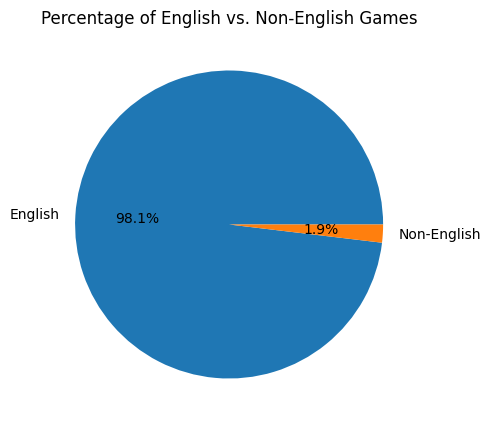

In [368]:
# Visualize proportion of english games
english_labels = ['English', 'Non-English']
english_data = games['english'].value_counts(normalize=True).values

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(english_data, labels=english_labels, autopct='%1.1f%%')

ax.set_title('Percentage of English vs. Non-English Games')

Although only a small part of the games in the data set are `non-English` games, only `english` games are included.

In [369]:
# Filtering 1: only enlgish games
games = games.loc[games['english'] == 1]
games.shape

(26564, 18)

## 2. Number of Games in Different Platforms

In [370]:
games['platforms'].value_counts()

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
mac                      3
mac;linux                1
linux                    1
Name: count, dtype: int64

In [371]:
# Percentage of games supporting each platform
platform_labels = ['windows', 'mac', 'linux']

platform_counts = {}
for platform in platform_labels:
    platform_counts[platform] = len(games.loc[games['platforms'].str.contains(platform)])/len(games)*100

platform_counts

{'windows': 99.981177533504,
 'mac': 30.17994277970185,
 'linux': 19.639361541936456}

Text(0, 0.5, 'Percentage out of Total Number of Games')

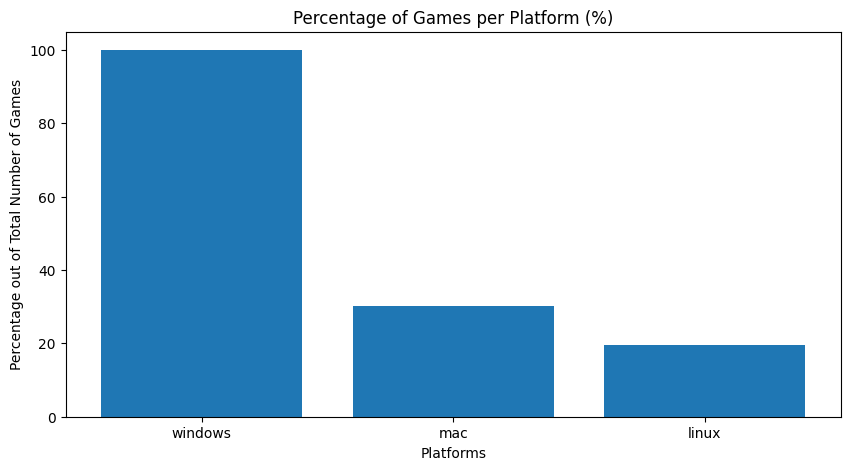

In [372]:
# Visualize percentage of games supporting each platform
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(platform_labels, list(platform_counts.values()))
ax.set_title('Percentage of Games per Platform (%)')
ax.set_xlabel('Platforms')
ax.set_ylabel('Percentage out of Total Number of Games')

Note that `windows` take near 100% of the games, and other two platforms are below 40%. Some games are cross-platform games that can be played on multiple platforms, only games that are compatible with windows are included.

In [373]:
# Filtering 2: games supporting windows
games = games[games['platforms'].str.contains('windows')]
games['platforms'].value_counts()

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
Name: count, dtype: int64

## 3. Distribution of Game Prices

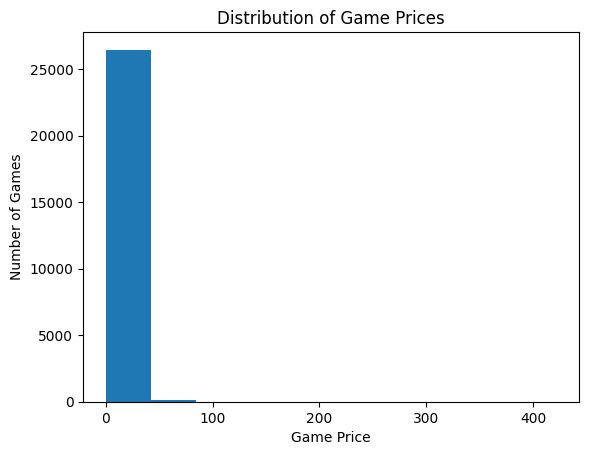

In [374]:
# Visualize distribution of prices per unit
plt.hist(games['price'])
plt.title('Distribution of Game Prices')
plt.xlabel('Game Price')
plt.ylabel('Number of Games')
plt.show()

Based on the distribution of game prices per unit, majority of prices are set between `0` to `100`. Although there are many games that are free, for the current project's purposes, I exclude free games. Also, I filter out any games that are more expensive than $100.

In [375]:
# Filtering - remove free games, and games more expensive than $100
games = games.loc[(games['price'] > 0) & (games['price'] <= 100)]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24083 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             24083 non-null  int64  
 1   name              24083 non-null  object 
 2   release_date      24083 non-null  object 
 3   english           24083 non-null  int64  
 4   developer         24082 non-null  object 
 5   publisher         24073 non-null  object 
 6   platforms         24083 non-null  object 
 7   required_age      24083 non-null  int64  
 8   categories        24083 non-null  object 
 9   genres            24083 non-null  object 
 10  steamspy_tags     24083 non-null  object 
 11  achievements      24083 non-null  int64  
 12  positive_ratings  24083 non-null  int64  
 13  negative_ratings  24083 non-null  int64  
 14  average_playtime  24083 non-null  int64  
 15  median_playtime   24083 non-null  int64  
 16  owners            24083 non-null  object 
 17

## 4. Different Genres of Games

In [376]:
games['genres'].value_counts()

genres
Action;Indie                                                                 1791
Casual;Indie                                                                 1425
Action;Adventure;Indie                                                       1194
Adventure;Indie                                                              1107
Action;Casual;Indie                                                           977
                                                                             ... 
Action;Casual;Free to Play;Indie;RPG;Simulation;Strategy                        1
Nudity;Adventure;Casual                                                         1
Sexual Content;Simulation                                                       1
Action;Adventure;Indie;Massively Multiplayer;Racing;Simulation                  1
Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy       1
Name: count, Length: 1135, dtype: int64

### Feature Engineering 1: Encode different genres

In [377]:
# reset index
games = games.reset_index().drop("index", axis=1)
games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [378]:
# Spliting the genres into a list
games['genres'] = games['genres'].str.split(";")

In [379]:
# label each genre into a separate column
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binary_genres = mlb.fit_transform(games['genres'])

genre_names = list(mlb.classes_)

genres_encoded = pd.DataFrame(binary_genres, columns=genre_names)
games_merged = pd.concat([games, genres_encoded], axis=1)

games_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Sexual Content,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],...,0,0,0,0,0,0,0,0,0,0


In [380]:
# genre counts
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(games_merged.loc[games_merged[genre] == 1])

# top 5 genres with most number of games
top_5_genres = [genre[0] for genre in sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]]
top_5_genres

['Indie', 'Action', 'Casual', 'Adventure', 'Simulation']

In [381]:
# Sort and normalize the counts
top_5_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]
total_counts = len(games_merged)
top_5_genre_counts = {item[0]: item[1]/total_counts*100 for item in top_5_genres}

Text(0.5, 1.0, 'Percentage of Games in Top 5 Most Popular Genres')

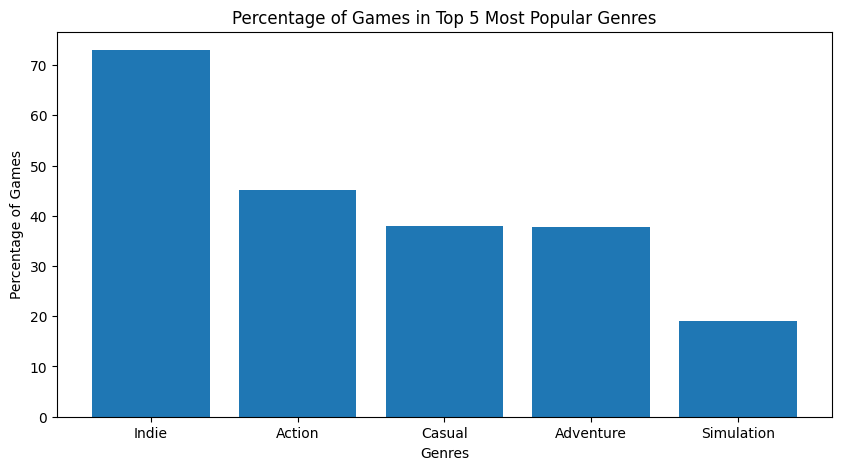

In [382]:
# Visualize 
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top_5_genre_counts.keys(), top_5_genre_counts.values())
ax.set_xlabel('Genres')
ax.set_ylabel('Percentage of Games')
ax.set_title('Percentage of Games in Top 5 Most Popular Genres')

As the bar graph above represents, `Indie` genre has the highest percentage of the games on Steam, followed by `Action` and `Casual`.

## 5. Ratings and Sales

### Feature Engineering 2: Create `rating_num`, `positive_ratio`, `sales_average` columns

`positive ratio` column is created to represent the proportion of number of positive ratings to total number of ratings. This can serve as an indicator of how many people rated this game as positive.

In addition, since the current data set does not have a column for `sales` related information, the target variable for future classification models are feature engineered. `low` and `high sales` columns are calculated from the `owners low` and `owners high` columns multiplied by the `price` column. This creates a range of sales, and the `sales average` column is created by taking an average of the low and high sales.

In [383]:
# Create positive_ratio column (proportion of number of positive ratings to total number of ratings)
def get_rating_ratio(df):
    df['rating_num'] = df['positive_ratings'] + df['negative_ratings']
    df['positive_ratio'] = df['positive_ratings'] / df['rating_num']

In [384]:
# Calculate low and high sales range
def get_low_high_sales(df):
    df[['owners_low', 'owners_high']] = df['owners'].str.split("-", expand=True).astype(int)
    df['sales_low'] = df['owners_low'] * df['price']
    df['sales_high'] = df['owners_high'] * df['price']


In [385]:
# Calculate average sales between low and high sales range
def get_average_sales(df):
    df['sales_average'] = (df['sales_high'] + df['sales_low'])/2

In [386]:
get_rating_ratio(games_merged)
get_low_high_sales(games_merged)
get_average_sales(games_merged)
games_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Video Production,Violent,Web Publishing,rating_num,positive_ratio,owners_low,owners_high,sales_low,sales_high,sales_average
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,127873,0.973888,10000000,20000000,71900000.0,143800000.0,107850000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,3951,0.839787,5000000,10000000,19950000.0,39900000.0,29925000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],...,0,0,0,3814,0.895648,5000000,10000000,19950000.0,39900000.0,29925000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,1540,0.826623,5000000,10000000,19950000.0,39900000.0,29925000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],...,0,0,0,5538,0.947996,5000000,10000000,19950000.0,39900000.0,29925000.0


### Remove outliers from `sales_average` columns

Before proceeding to categorization, I check for any outliers. I decide to remove any games that had `sales average` outside of absolute value of -3 and 3.

In [387]:
import numpy as np
from scipy import stats

games_merged = games_merged[(np.abs(stats.zscore(games_merged['sales_average'])) < 3)]
games_merged.shape


(23958, 54)

In [388]:
# reset index
games_merged = games_merged.reset_index().drop("index", axis=1)

In [389]:
games_merged['sales_average'].describe()

count    2.395800e+04
mean     7.136054e+05
std      3.166173e+06
min      7.200000e+03
25%      2.890000e+04
50%      6.965000e+04
75%      1.549000e+05
max      4.498500e+07
Name: sales_average, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1512b9720>,
 'caps': [<matplotlib.lines.Line2D at 0x1512b82e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1512b9ab0>],
 'medians': [<matplotlib.lines.Line2D at 0x151305450>],
 'fliers': [<matplotlib.lines.Line2D at 0x151304c10>],
 'means': []}

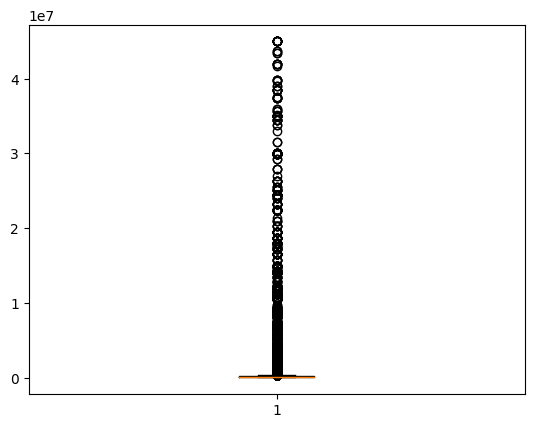

In [390]:
plt.boxplot(games_merged['sales_average'])

(array([2.3106e+04, 3.9800e+02, 1.4700e+02, 1.0300e+02, 6.4000e+01,
        3.9000e+01, 3.4000e+01, 2.5000e+01, 2.1000e+01, 2.1000e+01]),
 array([7.200000e+03, 4.504980e+06, 9.002760e+06, 1.350054e+07,
        1.799832e+07, 2.249610e+07, 2.699388e+07, 3.149166e+07,
        3.598944e+07, 4.048722e+07, 4.498500e+07]),
 <BarContainer object of 10 artists>)

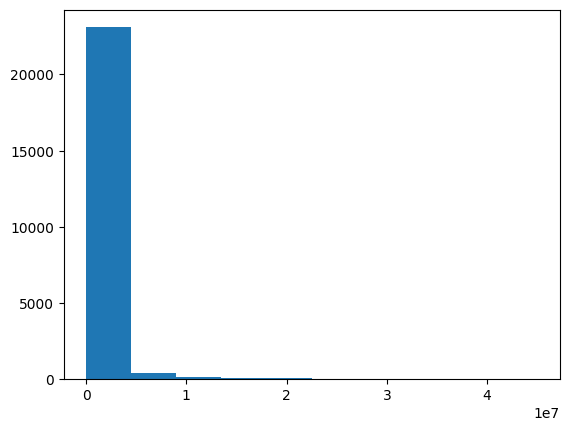

In [391]:
plt.hist(games_merged['sales_average'])

These visualizations display overall distribution of the calculated sales average value. It is evident that it is highly skewed to the right, with majority of average sales on the lower end of the distribution.

## Categorize `sales_average` column into `low`, `medium`, and `high`

Since `sales average` is a calculated variable, it is binned to different levels of sales. This can also help with business interpretability. I have decided on 3 different levels of sales categories: `low`, `medium`, and `high`. The cut off levels are determined by IQR:

- `low` = below 25th percentile
- `medium` = between 25th and 75th percentile
- `high` = above 75th percentile

In [392]:
# 3 bins (25 and 75th percentiles)

low_25 = games_merged['sales_average'].describe()[4]
top_25 = games_merged['sales_average'].describe()[6]

# define cutoff values 
bins = [games_merged['sales_average'].min(), low_25, top_25, games_merged['sales_average'].max()]

# define labels
labels = ['low', 'medium', 'high']

# categorize sales_average
games_merged['sales_category'] = pd.cut(games_merged['sales_average'], bins=bins, labels=labels)

In [393]:
games_merged.loc[games_merged['sales_category'].isna()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Violent,Web Publishing,rating_num,positive_ratio,owners_low,owners_high,sales_low,sales_high,sales_average,sales_category
17005,760740,Polaris,2017-12-20,1,Vyacheslav Notbad,Zotdinex,windows,0,Single-player,[Casual],...,0,0,7,0.571429,0,20000,0.0,14400.0,7200.0,NaN
20939,892910,Space Wars,2018-07-23,1,Star Studios,Star Studios,windows;mac;linux,0,Single-player;Full controller support,"[Action, Casual, Indie]",...,0,0,3,0.666667,0,20000,0.0,14400.0,7200.0,NaN


In [394]:
# Impute these two missing values with appropriate category
games_merged['sales_category'] = games_merged['sales_category'].fillna('low')

games_merged['sales_category'].isna().sum()

0

In [395]:
games_merged['sales_category'].value_counts(normalize=True)

sales_category
medium    0.479172
low       0.273061
high      0.247767
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage of Different Sales Levels')

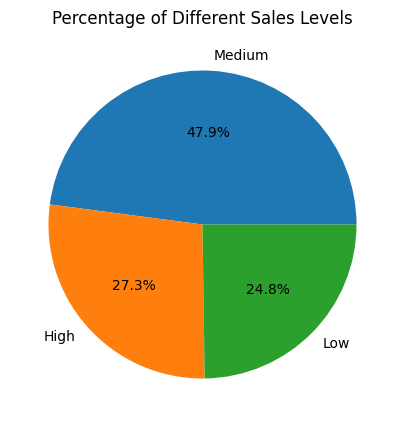

In [396]:
# Visualize proportion of different categories of sales
sales_labels = ['Medium', 'High', 'Low']
sales_data = games_merged['sales_category'].value_counts(normalize=True).values

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(sales_data, labels=sales_labels, autopct='%1.1f%%')

ax.set_title('Percentage of Different Sales Levels')

The pie graph above represents that about 50% of the games in the data set are categorized as `medium`. This is to be expected, as the `medium` level is between 25th and 75th percentile of the sales average.

In [397]:
rating_counts = {}
for label in labels:
    label_df = games_merged.loc[games_merged['sales_category'] == label]

    label_rating_num = {}
    for genre in top_5_genre_counts.keys():
        label_rating_num[genre] = label_df.loc[label_df[genre] == 1]['rating_num'].median()
    rating_counts[label] = label_rating_num

rating_counts

{'low': {'Indie': 14.0,
  'Action': 13.0,
  'Casual': 13.0,
  'Adventure': 15.0,
  'Simulation': 16.0},
 'medium': {'Indie': 23.0,
  'Action': 22.0,
  'Casual': 17.0,
  'Adventure': 23.0,
  'Simulation': 26.0},
 'high': {'Indie': 484.0,
  'Action': 595.5,
  'Casual': 320.5,
  'Adventure': 466.5,
  'Simulation': 501.5}}

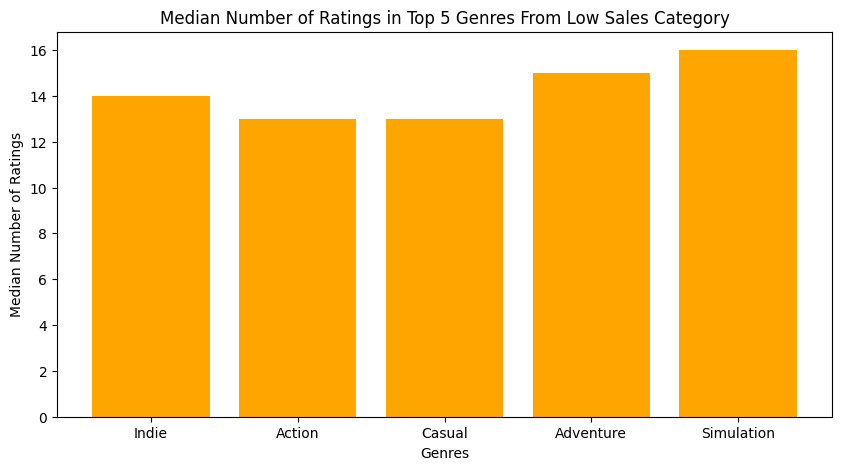

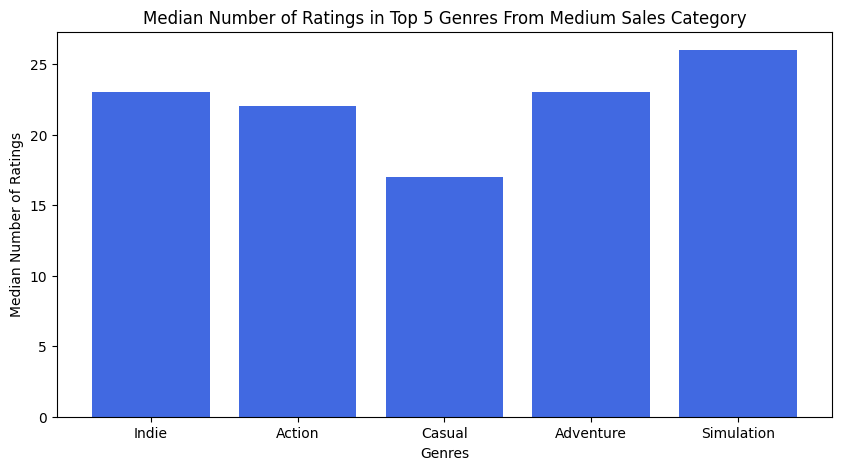

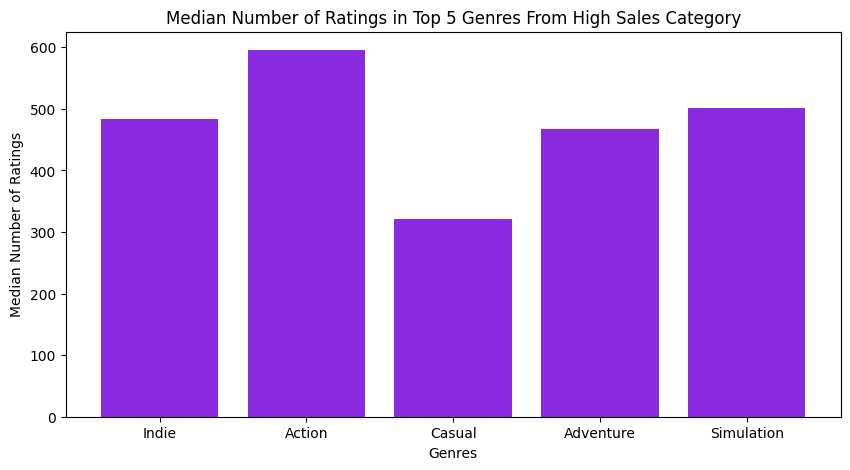

In [398]:
colors = ['orange', 'royalblue', 'blueviolet']
for i, label in enumerate(labels):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(rating_counts[label].keys(), rating_counts[label].values(), color=colors[i])
    ax.set_title(f'Median Number of Ratings in Top 5 Genres From {label.title()} Sales Category')
    ax.set_xlabel("Genres")
    ax.set_ylabel("Median Number of Ratings")


Series of bar graphs above display the median values of total number of ratings (both positive and negative) in top 5 most popular genres from low, medium, and high sales categories. Note the **scale of y-axis** on the `high` sales bar graph, which is significantly higher than other two categories. This may suggest that the **number of rating** is an important factor in determining the sales of the game on Steam.

# Pre-processing (`train_test_split` and `SMOTE`)

Before running our baseline model (`DummyClassifier`), Decision Tree, and Random Forest models, [**train test split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and [**SMOTE**](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) are completed as a part of pre-processing. The target variable is the `sales_category`. Since this variable is imbalanced, SMOTE is synthetically oversampling the minority categories.

`rating_num`, `positive_ratio`, and all genre columns are included as features.

In [399]:
# relevant_columns = ['appid', 'rating_num', 'positive_ratio'] + genre_names
relevant_columns = ['rating_num', 'positive_ratio'] + genre_names

len(relevant_columns)

31

In [400]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = games_merged[relevant_columns]
y = games_merged['sales_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [401]:
# SMOTE because imbalanced data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Baseline Model: `DummyClassifier`

[`DummyClasifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) is used as the baseline model. `stratified` strategy is used to randomly sample, instead of predicting the most frequent class.

In [402]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train_smote, y_train_smote)

print(f"Dummy Classifier train set accuracy: {dummy_clf.score(X_train_smote, y_train_smote)}")
print(f"Dummy Classifier test set accuracy: {dummy_clf.score(X_test, y_test)}")


Dummy Classifier train set accuracy: 0.33352724452200894
Dummy Classifier test set accuracy: 0.32838063439065107


In [403]:
y_pred_dummy_clf = dummy_clf.predict(X_test)

report = classification_report(y_test, y_pred_dummy_clf)
print(report)

              precision    recall  f1-score   support

        high       0.23      0.32      0.27      1469
         low       0.26      0.32      0.29      1636
      medium       0.49      0.34      0.40      2885

    accuracy                           0.33      5990
   macro avg       0.33      0.33      0.32      5990
weighted avg       0.37      0.33      0.34      5990



In [404]:
def plot_confusion_matrix(estimator, est_name, test, labels):

    from sklearn.metrics import ConfusionMatrixDisplay

    y_pred = estimator.predict(X_test)

    fig, ax = plt.subplots(figsize=(10,5))
    ConfusionMatrixDisplay.from_predictions(test, y_pred, labels=labels, ax=ax)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    ax.set_title(f"Confusion Matrix for Sales Categories from {est_name}")

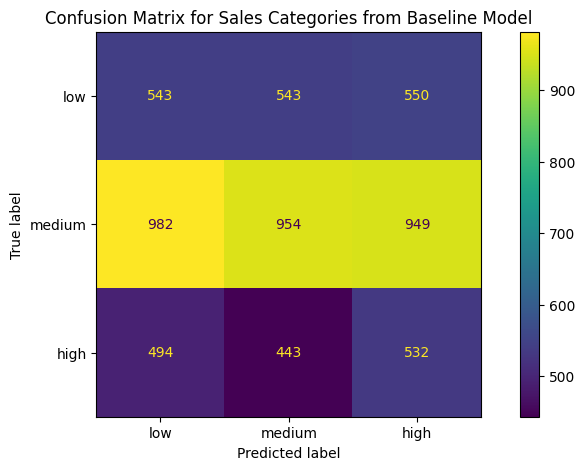

In [405]:
cm_labels = ['low', 'medium', 'high']

plot_confusion_matrix(estimator=dummy_clf,
                        est_name = 'Baseline Model',
                        test=y_test,
                        labels=cm_labels)

**Interpretation**: this model can serve as a baseline. The accuracy scores from next models can be compared to the accuracy score from the baseline model, and the following models aim to yield higher accuracy score.

# Classification Model 1: Decision Tree

In [406]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train_smote, y_train_smote)

# Checking overfitting
print(f"Decision Tree default model\nTrain set accuracy: {dt_clf.score(X_train_smote, y_train_smote)}\nTest set accuracy : {dt_clf.score(X_test, y_test)}")


Decision Tree default model
Train set accuracy: 0.6432421950746559
Test set accuracy : 0.5382303839732888


Initially, the decision tree model is slightly **overfitting**, as the train set accuracy score is higher than the test set. Below, `GridSearchCV` is used to find more optimal hyper-parameters to potentially reduce overfitting.

In [407]:
from sklearn.model_selection import GridSearchCV

dt_grid = {
    'max_depth': [3, 4, 5, 6],
    'criterion': ['gini', 'entropy', 'log_loss']
}

gs_dt = GridSearchCV(estimator=dt_clf, param_grid=dt_grid)
gs_dt.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6]})

In [408]:
gs_dt.best_params_
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=42)

In [409]:
# Run decision tree with best parameters from grid search
dt_clf_final = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)
dt_clf_final.fit(X_train_smote, y_train_smote)

# Checking overfitting
print(f"Decision Tree final model\nTrain set accuracy: {dt_clf_final.score(X_train_smote, y_train_smote)}\nTest set accuracy : {dt_clf_final.score(X_test, y_test)}")


Decision Tree final model
Train set accuracy: 0.6781849912739966
Test set accuracy : 0.6272120200333889


After running the final model of decision tree based on the best estimator from grid search, the overfitting appears to be **decreased** slightly. This is because the different between the train and test set accuracy scores is smaller (approximately 0.05 compared to 0.1). 

[Text(0.5, 0.9285714285714286, 'x[0] <= 132.5\ngini = 0.667\nsamples = 25785\nvalue = [8595, 8595, 8595]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= 50.5\ngini = 0.58\nsamples = 17433\nvalue = [1637, 8228, 7568]'),
 Text(0.125, 0.6428571428571429, 'x[10] <= 0.5\ngini = 0.534\nsamples = 13791\nvalue = [556, 7221, 6014]'),
 Text(0.0625, 0.5, 'x[15] <= 0.5\ngini = 0.528\nsamples = 12411\nvalue = [517, 6872, 5022]'),
 Text(0.03125, 0.35714285714285715, 'x[0] <= 20.5\ngini = 0.579\nsamples = 2821\nvalue = [337, 969, 1515]'),
 Text(0.015625, 0.21428571428571427, 'x[4] <= 0.5\ngini = 0.53\nsamples = 1958\nvalue = [90, 780, 1088]'),
 Text(0.0078125, 0.07142857142857142, 'gini = 0.547\nsamples = 1314\nvalue = [72, 571, 671]'),
 Text(0.0234375, 0.07142857142857142, 'gini = 0.475\nsamples = 644\nvalue = [18, 209, 417]'),
 Text(0.046875, 0.21428571428571427, 'x[7] <= 0.5\ngini = 0.625\nsamples = 863\nvalue = [247, 189, 427]'),
 Text(0.0390625, 0.07142857142857142, 'gini = 0.638\nsamples = 584\nval

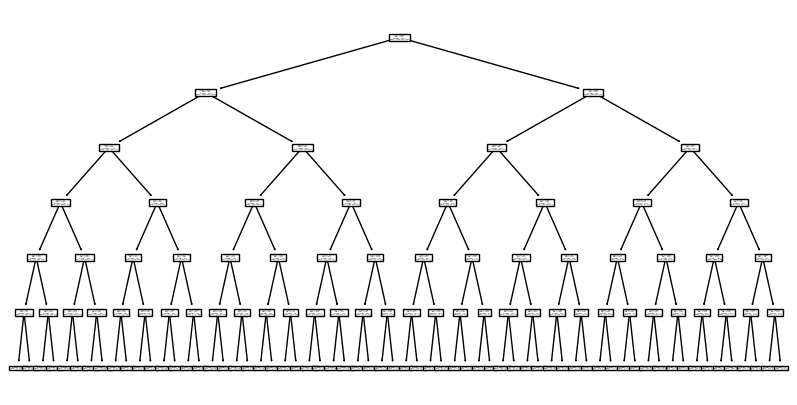

In [410]:
from sklearn.tree import plot_tree

f, ax = plt.subplots(figsize=(10,5))
plot_tree(dt_clf_final, ax=ax)

In [411]:
# Getting feature importance
def get_feature_importance(estimator):
    feature_imp = {}
    for fi, feature in zip(estimator.feature_importances_, estimator.feature_names_in_):
        feature_imp[feature] = fi

    top_5_imp_features = {key:value for key, value in sorted(feature_imp.items(), key=lambda x: x[1], reverse=True)[:5]}

    return top_5_imp_features


In [412]:
get_feature_importance(dt_clf_final)

{'rating_num': 0.8250126249861981,
 'Indie': 0.07165641706446897,
 'Early Access': 0.04660064874401524,
 'Casual': 0.025944574644674853,
 'positive_ratio': 0.019759939045162912}

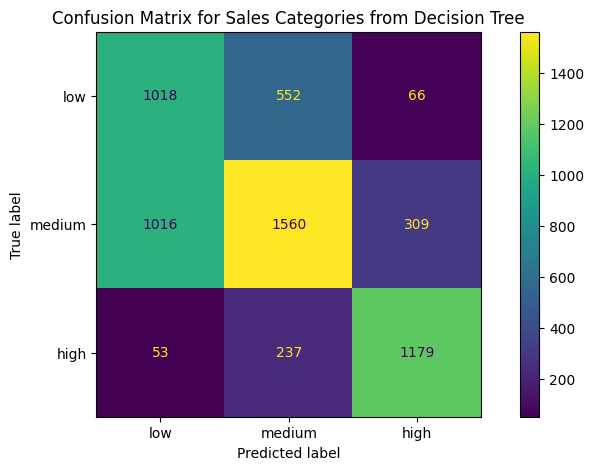

In [413]:
# Plot confusion matrix
plot_confusion_matrix(estimator=dt_clf_final,
                        est_name = 'Decision Tree',
                        test=y_test,
                        labels=cm_labels)

**Interpretation**: 

The accuracy score from the final model of the decision tree is higher than the baseline model, so I conclude this is a more suitable model compared to the baseline.

Based on the feature importance, decision tree model points out the `rating_num` as the most important feature in classifying sales categories. Other important features include `Indie`, `early access`, `Casual`, and `positive_ratio`.

# Classification Model 2: Random Forest Classifier

To attempt to reduce slight overfitting in the previous decision tree model, [**random forest classifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is used as an ensemble model. Since it is an ensemble model, the run time may be longer.

In [414]:
# Initial random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote)

print(f"Random Forest default model\nTrain set accuracy: {rfc.score(X_train_smote, y_train_smote)}\nTest set accuracy : {rfc.score(X_test, y_test)}")


Random Forest default model
Train set accuracy: 0.950397517936785
Test set accuracy : 0.6131886477462437


From the baseline Random Forest model, it is **more significantly overfitting**, as the train set accuracy score is a lot higher than test set accuracy score. Below, [**Randomized Search**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and [**Grid Search**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) are used to address the overfitting issue. **Rarndomized search** is to try randomized search on hyper parameters without taking too long of a run time. Once we find more optimal hyper parameters, **grid search** is completed to find the final estimator.

In [416]:
# Preparing for randomized search
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

n_estimators_num = [int(x) for x in np.linspace(start=100, stop=1500, num=15)]
max_depth_num = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_depth_num.append('None')
min_samples_split_num = [2, 4, 6, 8, 10]
min_samples_leaf_num = [1, 2, 3, 4, 5]

random_grid = {'n_estimators': n_estimators_num,
                'max_depth': max_depth_num,
                'min_samples_split': min_samples_leaf_num,
                'min_samples_leaf': min_samples_split_num}

In [420]:
rfc_randomgs = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, random_state=42)
rfc_randomgs.fit(X_train_smote, y_train_smote)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/s

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 'None'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42)

In [421]:
rfc_randomgs.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [431]:
rfc_grid = {'n_estimators': [100, 500, 900],
            'criterion': ['gini', 'entropy', 'log_loss'],
            # 'min_samples_split': [2, 3],
            'min_samples_leaf': [1, 2],
            'max_depth': [20, 30, 40]}

rfc_gs = GridSearchCV(estimator=rfc, param_grid=rfc_grid, cv=3)
rfc_gs.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [20, 30, 40], 'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 500, 900]})

In [432]:
rfc_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [433]:
print(f"Random Forest grid search best estimator\nTrain set accuracy: {rfc_gs.best_estimator_.score(X_train_smote, y_train_smote)}\nTest set accuracy : {rfc_gs.best_estimator_.score(X_test, y_test)}")

Random Forest grid search best estimator
Train set accuracy: 0.8937754508435136
Test set accuracy : 0.6198664440734558


Although the train set accuracy score has decreased slightly, the Random Forest model is **still overfitting** significantly. One possibility is that the most optimal hyper-parameters have not been applied to the final model, despite our attempts with the randomized and grid search.

In [435]:
rfc_final = RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
rfc_final.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500,
                       random_state=42)

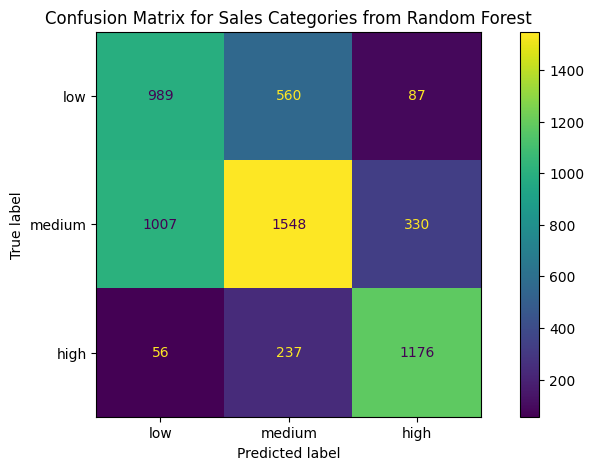

In [436]:
plot_confusion_matrix(estimator=rfc_final,
                        est_name = 'Random Forest',
                        test=y_test,
                        labels=cm_labels)

In [437]:
get_feature_importance(rfc_final)

{'rating_num': 0.5535886886026792,
 'positive_ratio': 0.2002944639699766,
 'Indie': 0.055024204851497435,
 'Casual': 0.04977647533597494,
 'Early Access': 0.022242643758044547}

**Interpretation**:

Although this Random Forest model is still overfitting, the important features are very similar to that of the decision tree. Noteably, `rating_num` variable is the most important feature in determining sales class, which is congruent with the decision tree model. The accuracy score from the decision tree model is better, so we are considering the decision tree model as the best model thus far.

# Classification Model 3: Logistic Regression

For the Logistic Regression model, continuous variables (`rating_num` and `positive_ratio`) need to be standardized. Therefore, I run `StandardScaler` on the these select features, and complete `SMOTE` again.

In [439]:
# Pre-processing - standard scaler
from sklearn.preprocessing import StandardScaler

cont_columns = ['rating_num', 'positive_ratio']

ss = StandardScaler()

cont_features_train = ss.fit_transform(X_train[cont_columns])
cont_features_test = ss.transform(X_test[cont_columns])
cont_features_train, cont_features_test

(array([[ 0.58875944, -0.17019991],
        [-0.17858473,  0.08886727],
        [-0.18631869,  1.19997764],
        ...,
        [ 0.0187996 , -1.63893022],
        [-0.18934503, -0.89878639],
        [-0.18766373,  0.60033078]]),
 array([[-0.18900877,  1.19997764],
        [-0.18900877, -2.99755041],
        [-0.18598243,  1.19997764],
        ...,
        [ 1.82720315,  0.67869769],
        [-0.18799999, -0.19919838],
        [-0.18665495, -0.47903358]]))

In [440]:
X_train[cont_columns] = cont_features_train
X_test[cont_columns] = cont_features_test
X_train

,rating_num,positive_ratio,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,...,Sexual Content,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
1670,0.588759,-0.170200,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5427,-0.178585,0.088867,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21638,-0.186319,1.199978,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12154,-0.161099,0.955935,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10684,-0.178921,0.691186,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-0.189681,-2.997550,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,-0.177240,-0.346480,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
860,0.018800,-1.638930,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15795,-0.189345,-0.898786,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [441]:
# SMOTE on scaled train set
smote_logreg = SMOTE(random_state=42)

X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [442]:
# Baseline logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled_smote, y_train_smote)

print(f"Logistic Regression default model\nTrain set accuracy: {logreg.score(X_train_smote, y_train_smote)}\nTest set accuracy : {logreg.score(X_test, y_test)}")


Logistic Regression default model
Train set accuracy: 0.3333333333333333
Test set accuracy : 0.6093489148580968


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Interestingly, the Logistic Regression model seems to be **underfitting**, since the train set has lower accuracy score than the test set. Again, I complete **grid search** to find more optimal hyper-parameters.

In [443]:
# Grid search
logreg_grid = {
    'max_iter': [50, 100, 150],
    'solver': ['saga', 'lbfgs', 'sag', 'newton-cg']
}

logreg_gs = GridSearchCV(estimator=logreg, param_grid=logreg_grid)
logreg_gs.fit(X_train_scaled_smote, y_train_smote)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [50, 100, 150],
                         'solver': ['saga', 'lbfgs', 'sag', 'newton-cg']})

In [444]:
logreg_gs.best_params_
# logreg_gs.best_estimator_.score(X_test, y_test)

{'max_iter': 50, 'solver': 'lbfgs'}

In [445]:
logreg_final = LogisticRegression(max_iter=50, solver='lbfgs', random_state=42)
logreg_final.fit(X_train_scaled_smote, y_train_smote)

print(f"Logistic Regression final model\nTrain set accuracy: {logreg_final.score(X_train_scaled_smote, y_train_smote)}\nTest set accuracy : {logreg_final.score(X_test, y_test)}")


Logistic Regression final model
Train set accuracy: 0.6660073686251696
Test set accuracy : 0.6100166944908181


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The final Logistic Regression model based on the best estimator from grid search show accuracy scores that are **not underfitting**. Also, it does not appear to be overfitting dramatically.

In [446]:
# Get coefficients for each class in odds for interpretability
def get_class_odds_coef(estimator, column_names):
    import numpy as np

    coef = estimator.coef_
    logreg_final_coef = {}


    for i in range(len(estimator.classes_)):
        class_coef = {}
        for j in range(len(coef[i])): 
            class_coef[column_names[j]] = np.exp(coef[i][j])
        logreg_final_coef[estimator.classes_[i]] = class_coef

    return logreg_final_coef


In [447]:
get_class_odds_coef(estimator=logreg_final, column_names=relevant_columns)

{'high': {'rating_num': 633848548.1108629,
  'positive_ratio': 0.9225641832192342,
  'Accounting': 0.8796622972139664,
  'Action': 0.889050558752742,
  'Adventure': 1.0628137404892524,
  'Animation & Modeling': 1.5467829239336306,
  'Audio Production': 0.8364896399167226,
  'Casual': 0.5826635973996666,
  'Design & Illustration': 2.0097906056043304,
  'Documentary': 0.9796003733004086,
  'Early Access': 0.6513479835847806,
  'Education': 0.941872580295915,
  'Free to Play': 0.9371113112648207,
  'Game Development': 1.0093081650785913,
  'Gore': 1.1387208392371717,
  'Indie': 0.4482719652576189,
  'Massively Multiplayer': 0.3827629284680473,
  'Nudity': 0.923343454405051,
  'Photo Editing': 1.5086751608049311,
  'RPG': 1.0644297728101741,
  'Racing': 0.9903094576468784,
  'Sexual Content': 0.7657462152314101,
  'Simulation': 0.8166442503285244,
  'Software Training': 1.2642302258354816,
  'Sports': 1.2629862435123167,
  'Strategy': 1.2793937017207866,
  'Tutorial': 0.9796003733004086,
 

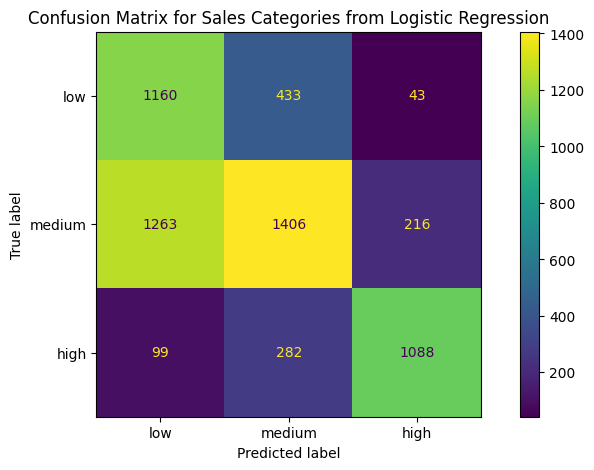

In [448]:
plot_confusion_matrix(estimator=logreg_final,
                        est_name = 'Logistic Regression',
                        test=y_test,
                        labels=cm_labels)

**Interpretation**:

The accuracy score of the logistic regression model is still slightly lower than the decision tree model. Therefore, the final model I choose is the decision tree. Logistic regression model is still very valuable, since it gives out important coefficients for genres. For examples, the odds of coefficients reveal that **sports** and **strategy** genres are about 26% more likely to lead to high sales.

# Conclusion

## Recommendations

Based on findings from the models above, here are some actionable recommendations:

1. **In-game event to encourage ratings on steam**. This is to maximize users inputing ratings on Steam, as the number of ratings is one of the most important feature in determining the sales class.

2. **Strategy, education and multi-player genres**. These genres appear to increase sales especially in high and medium sales category. Developing a new game that can be categorized into strategy, education, or multi-player genres can be beneficial for maximizing revenue.

3. **Consider early access before official launch**. This strategy can maximize hype around the official launch, and potentially increase sales.

## Future Insights

Here are some insights for future directions, to help develop a successful game and release on Steam.

1. **Investigate the inflence of sequels**, as the current Steam sales dataset did not entail any information regarding sequels. If the developer company has a previous game that was successful, it may be beneficial to consider developing a sequel.

2. **Investigate the difference between console vs. computer games sales**

3. **Consider the VR games market**. 